In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from timeit import default_timer as timer

import importlib
import utils
import networks

# change the default figure size
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams.update({'font.size': 16})

In [2]:
# loss_list1 = pd.read_csv('test_final_performance/awpinn/1-1-1/average_loss.csv')['Average_MSE_Loss'].to_numpy()
# loss_list2 = pd.read_csv('test_final_performance/awpinn/1-1.5-1.5/average_loss.csv')['Average_MSE_Loss'].to_numpy()
# loss_list3 = pd.read_csv('test_final_performance/awpinn/1.5-1-1/average_loss.csv')['Average_MSE_Loss'].to_numpy()
# loss_list4 = pd.read_csv('test_final_performance/awpinn/2-1-1/average_loss.csv')['Average_MSE_Loss'].to_numpy()

# fig = plt.figure(figsize=(12,9))
# plt.plot(range(10000), [np.log(item) for item in loss_list1[:10000]], color='blue', label='1-1-1')
# plt.plot(range(10000), [np.log(item) for item in loss_list2[:10000]], color='red', label='1-1.5-1.5')
# plt.plot(range(10000), [np.log(item) for item in loss_list3[:10000]], color='green', label='1.5-1-1')
# plt.plot(range(10000), [np.log(item) for item in loss_list4[:10000]], color='black', label='2-1-1')
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.legend()
# plt.title(f'Speed of convergence for different PINN models')
# plt.grid(True)

# Compare AWIPINN, IPINN, AWPINN and PINN

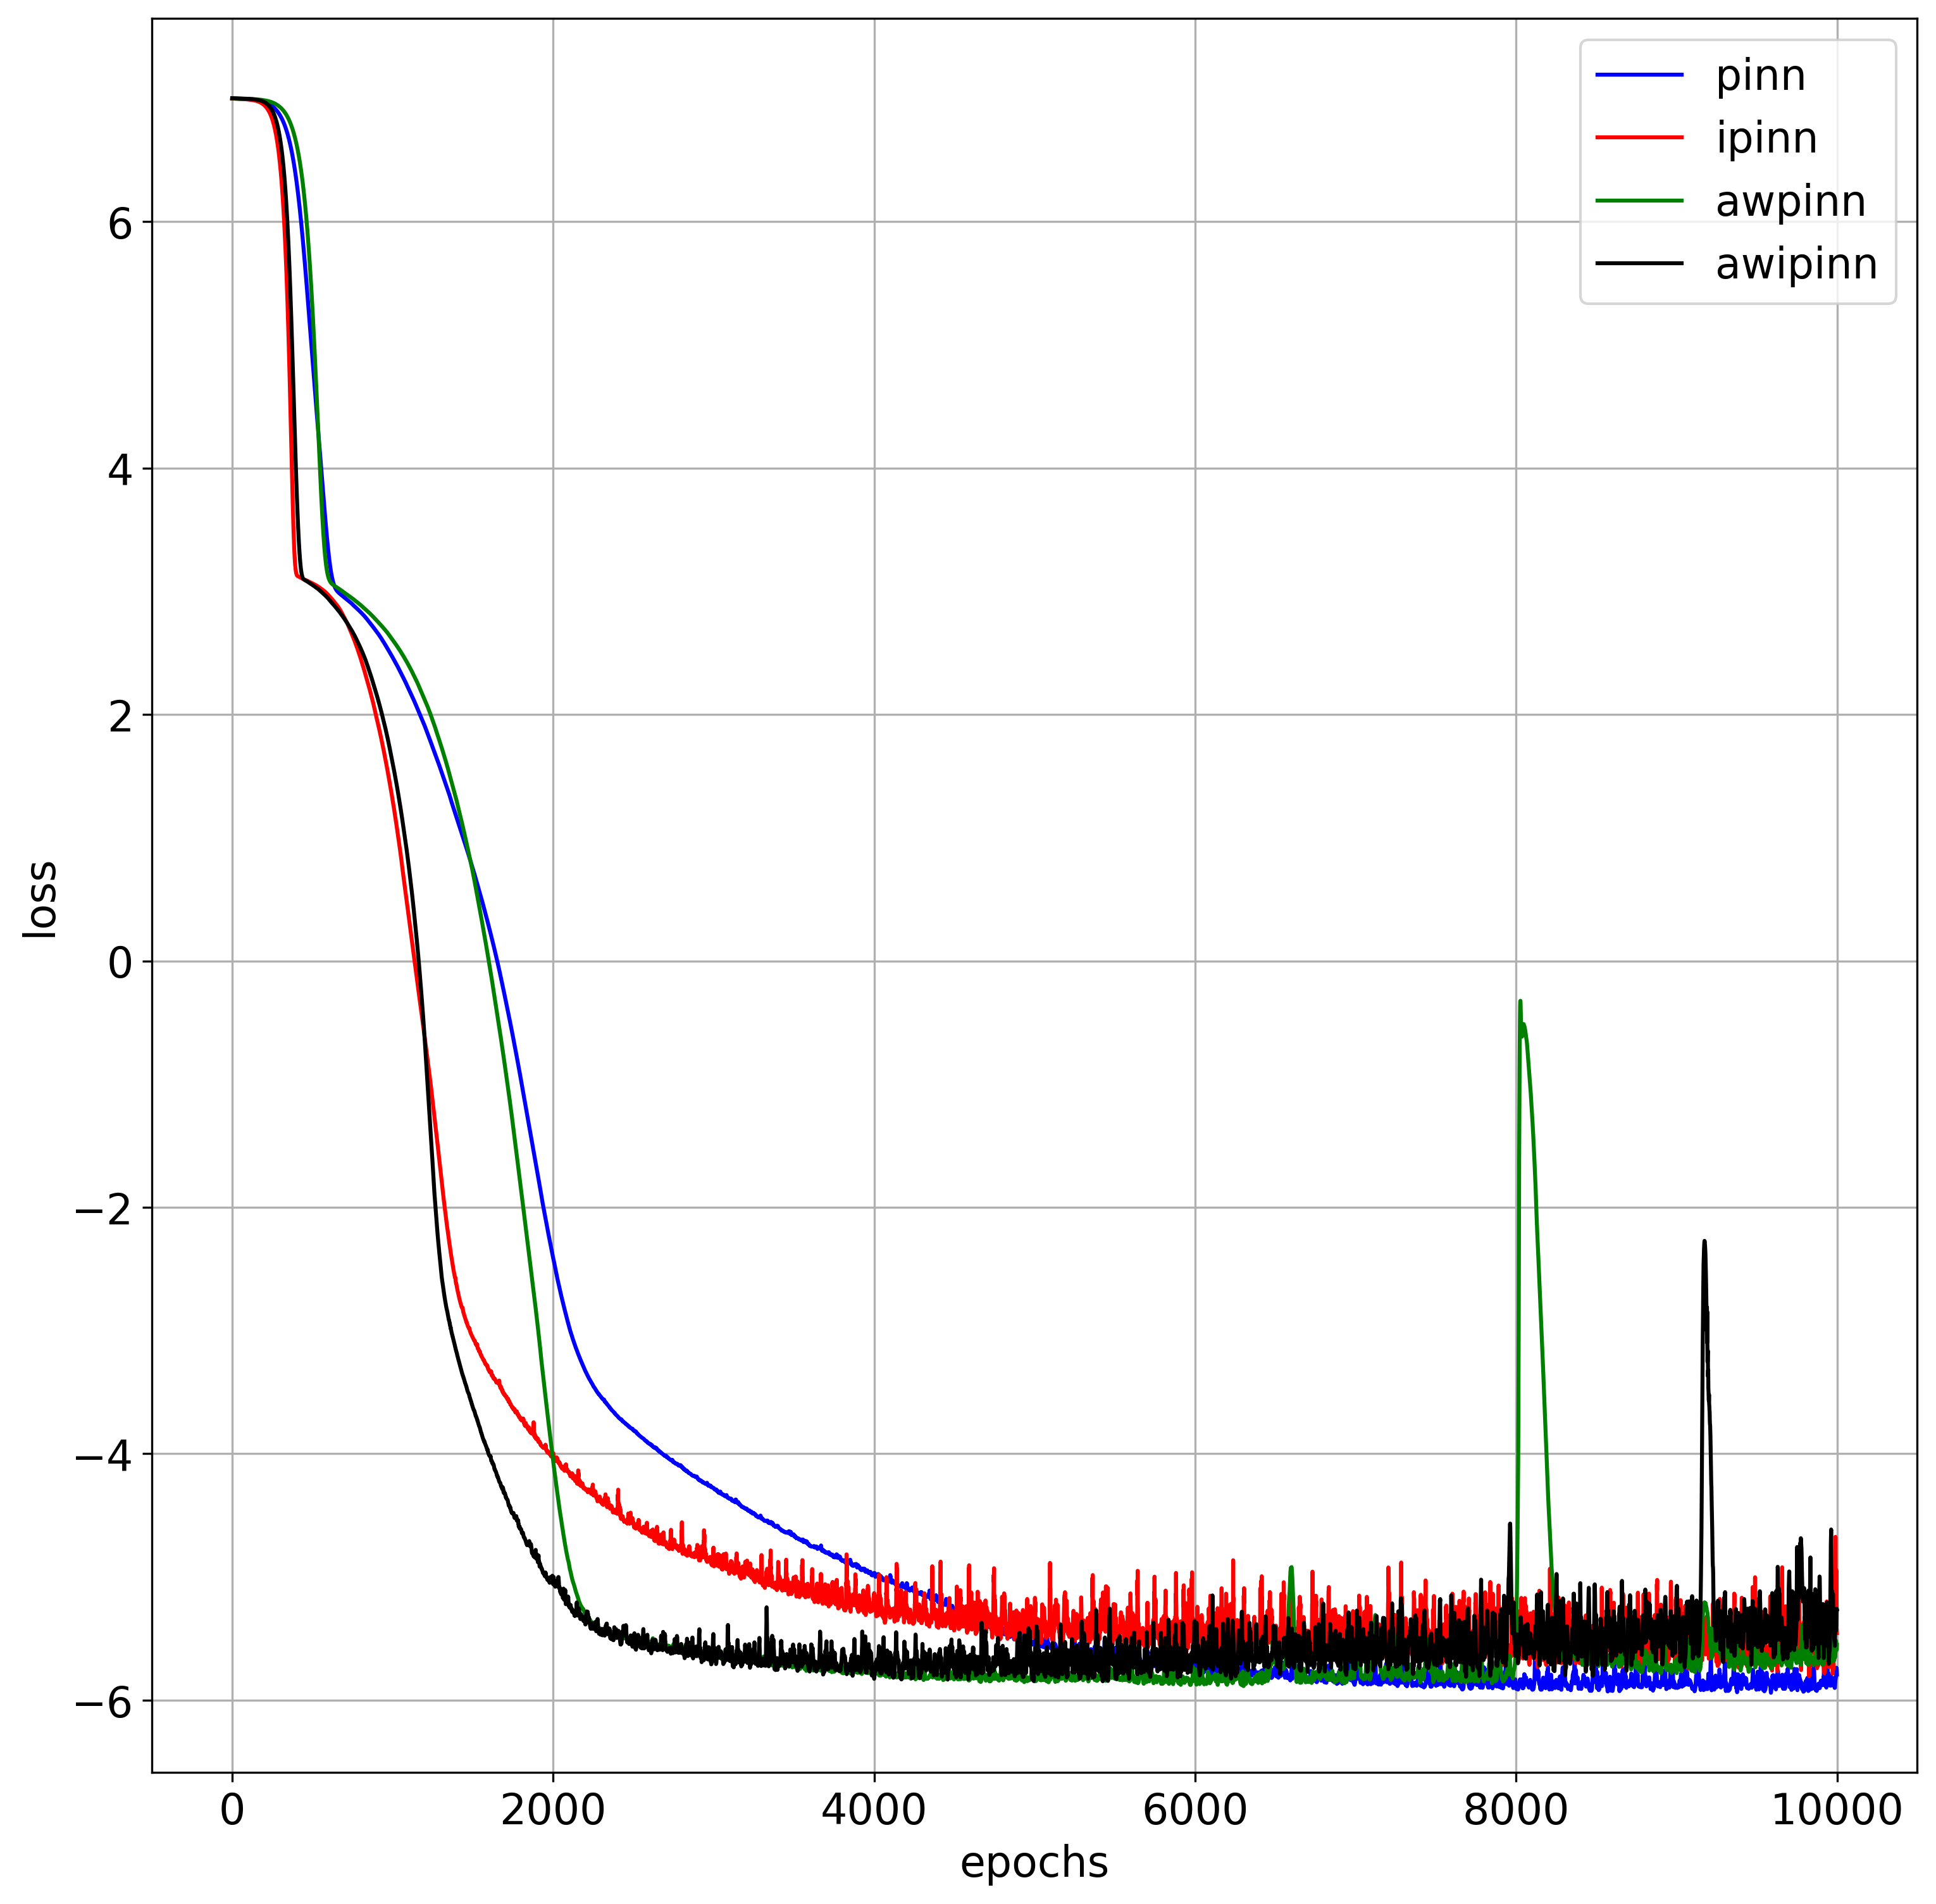

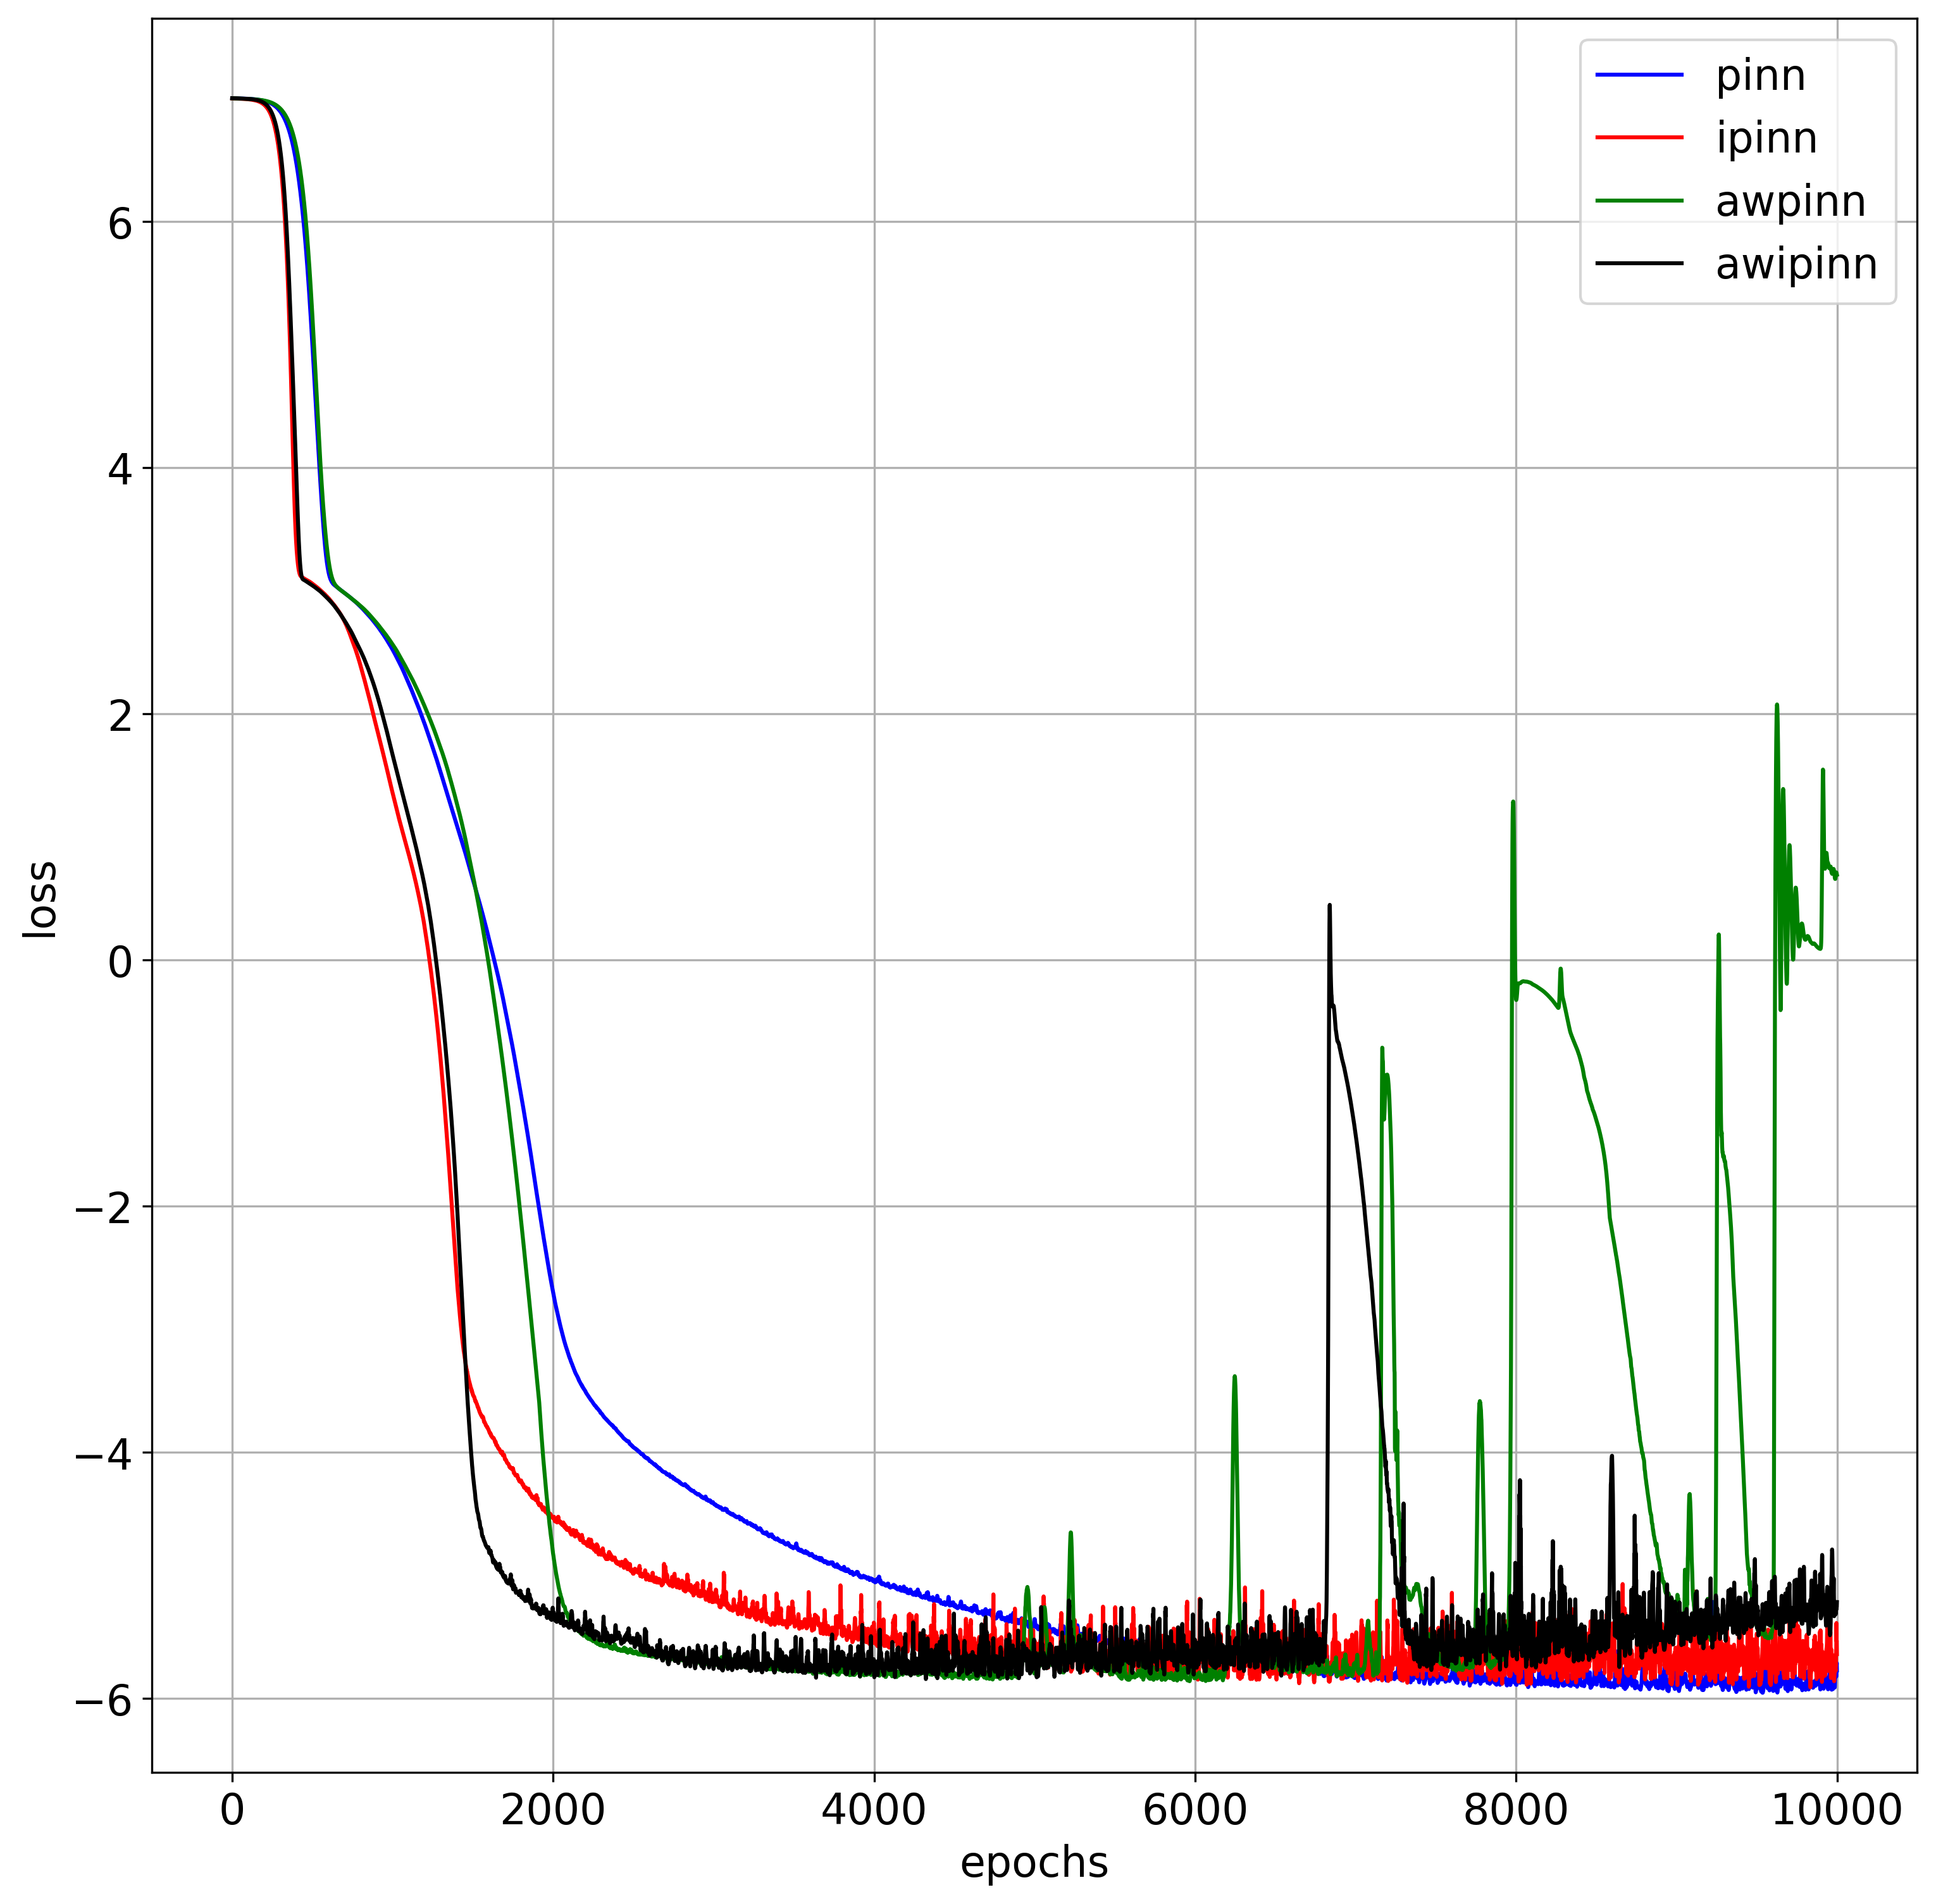

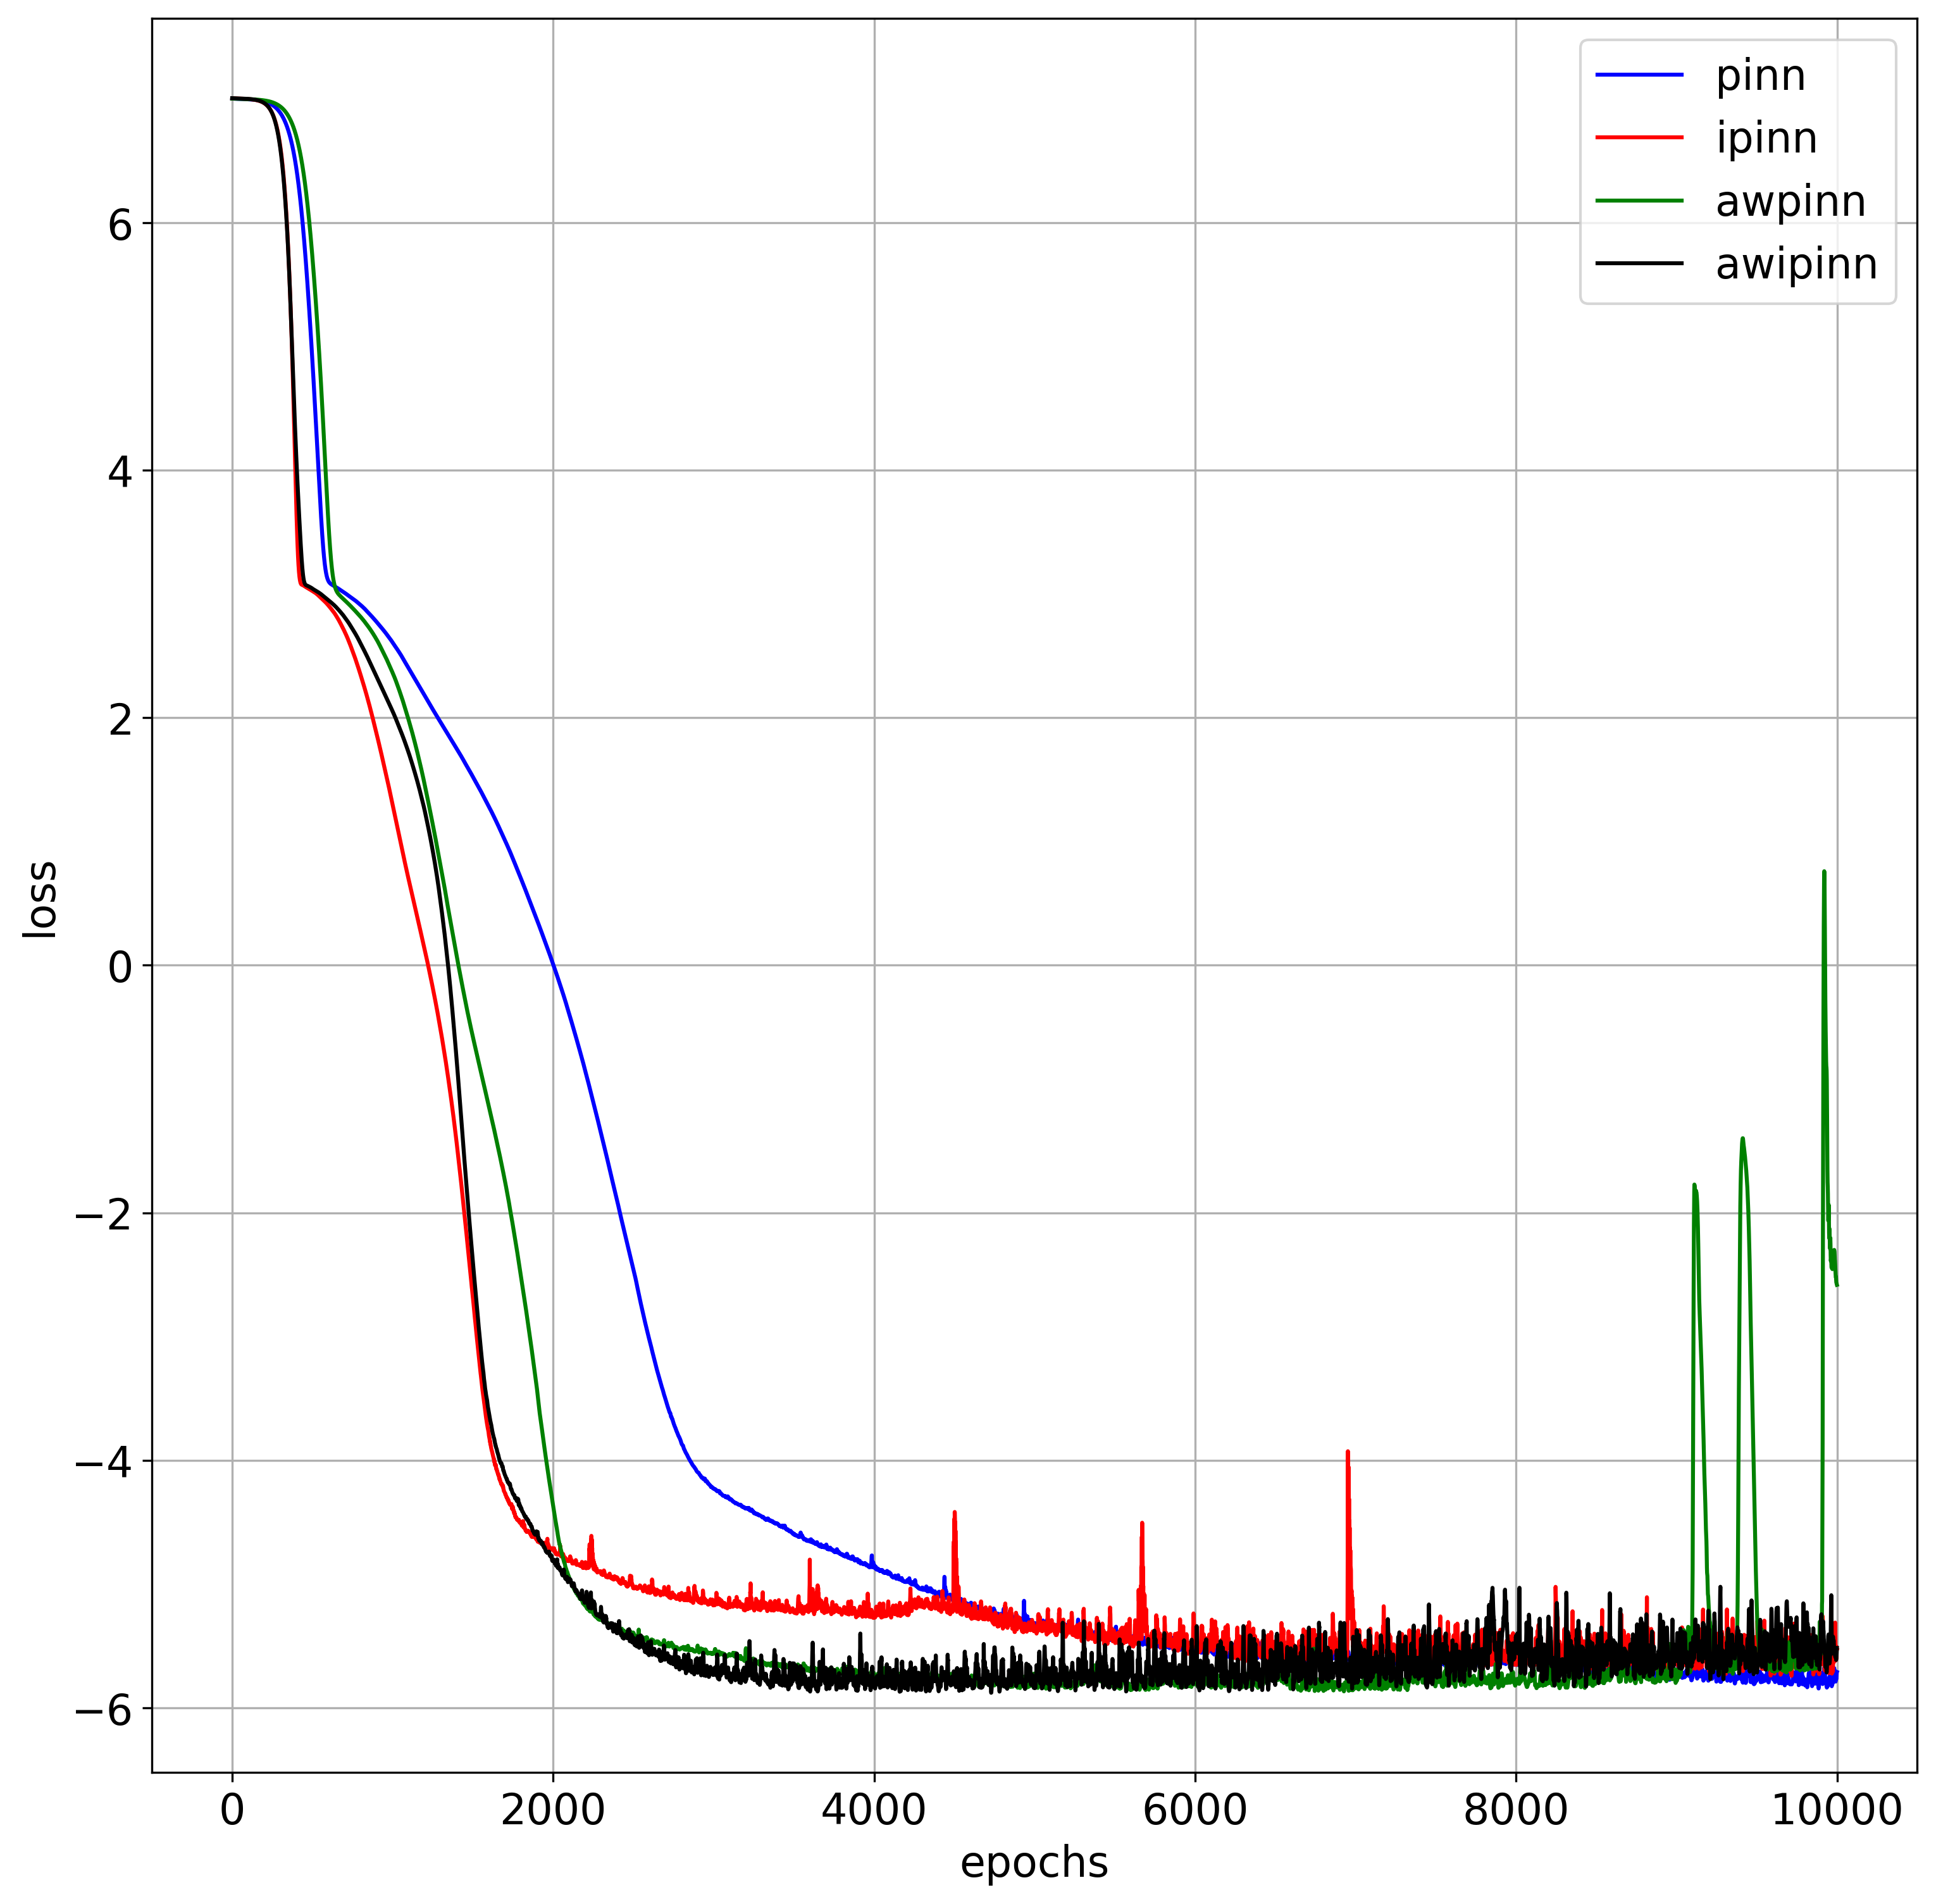

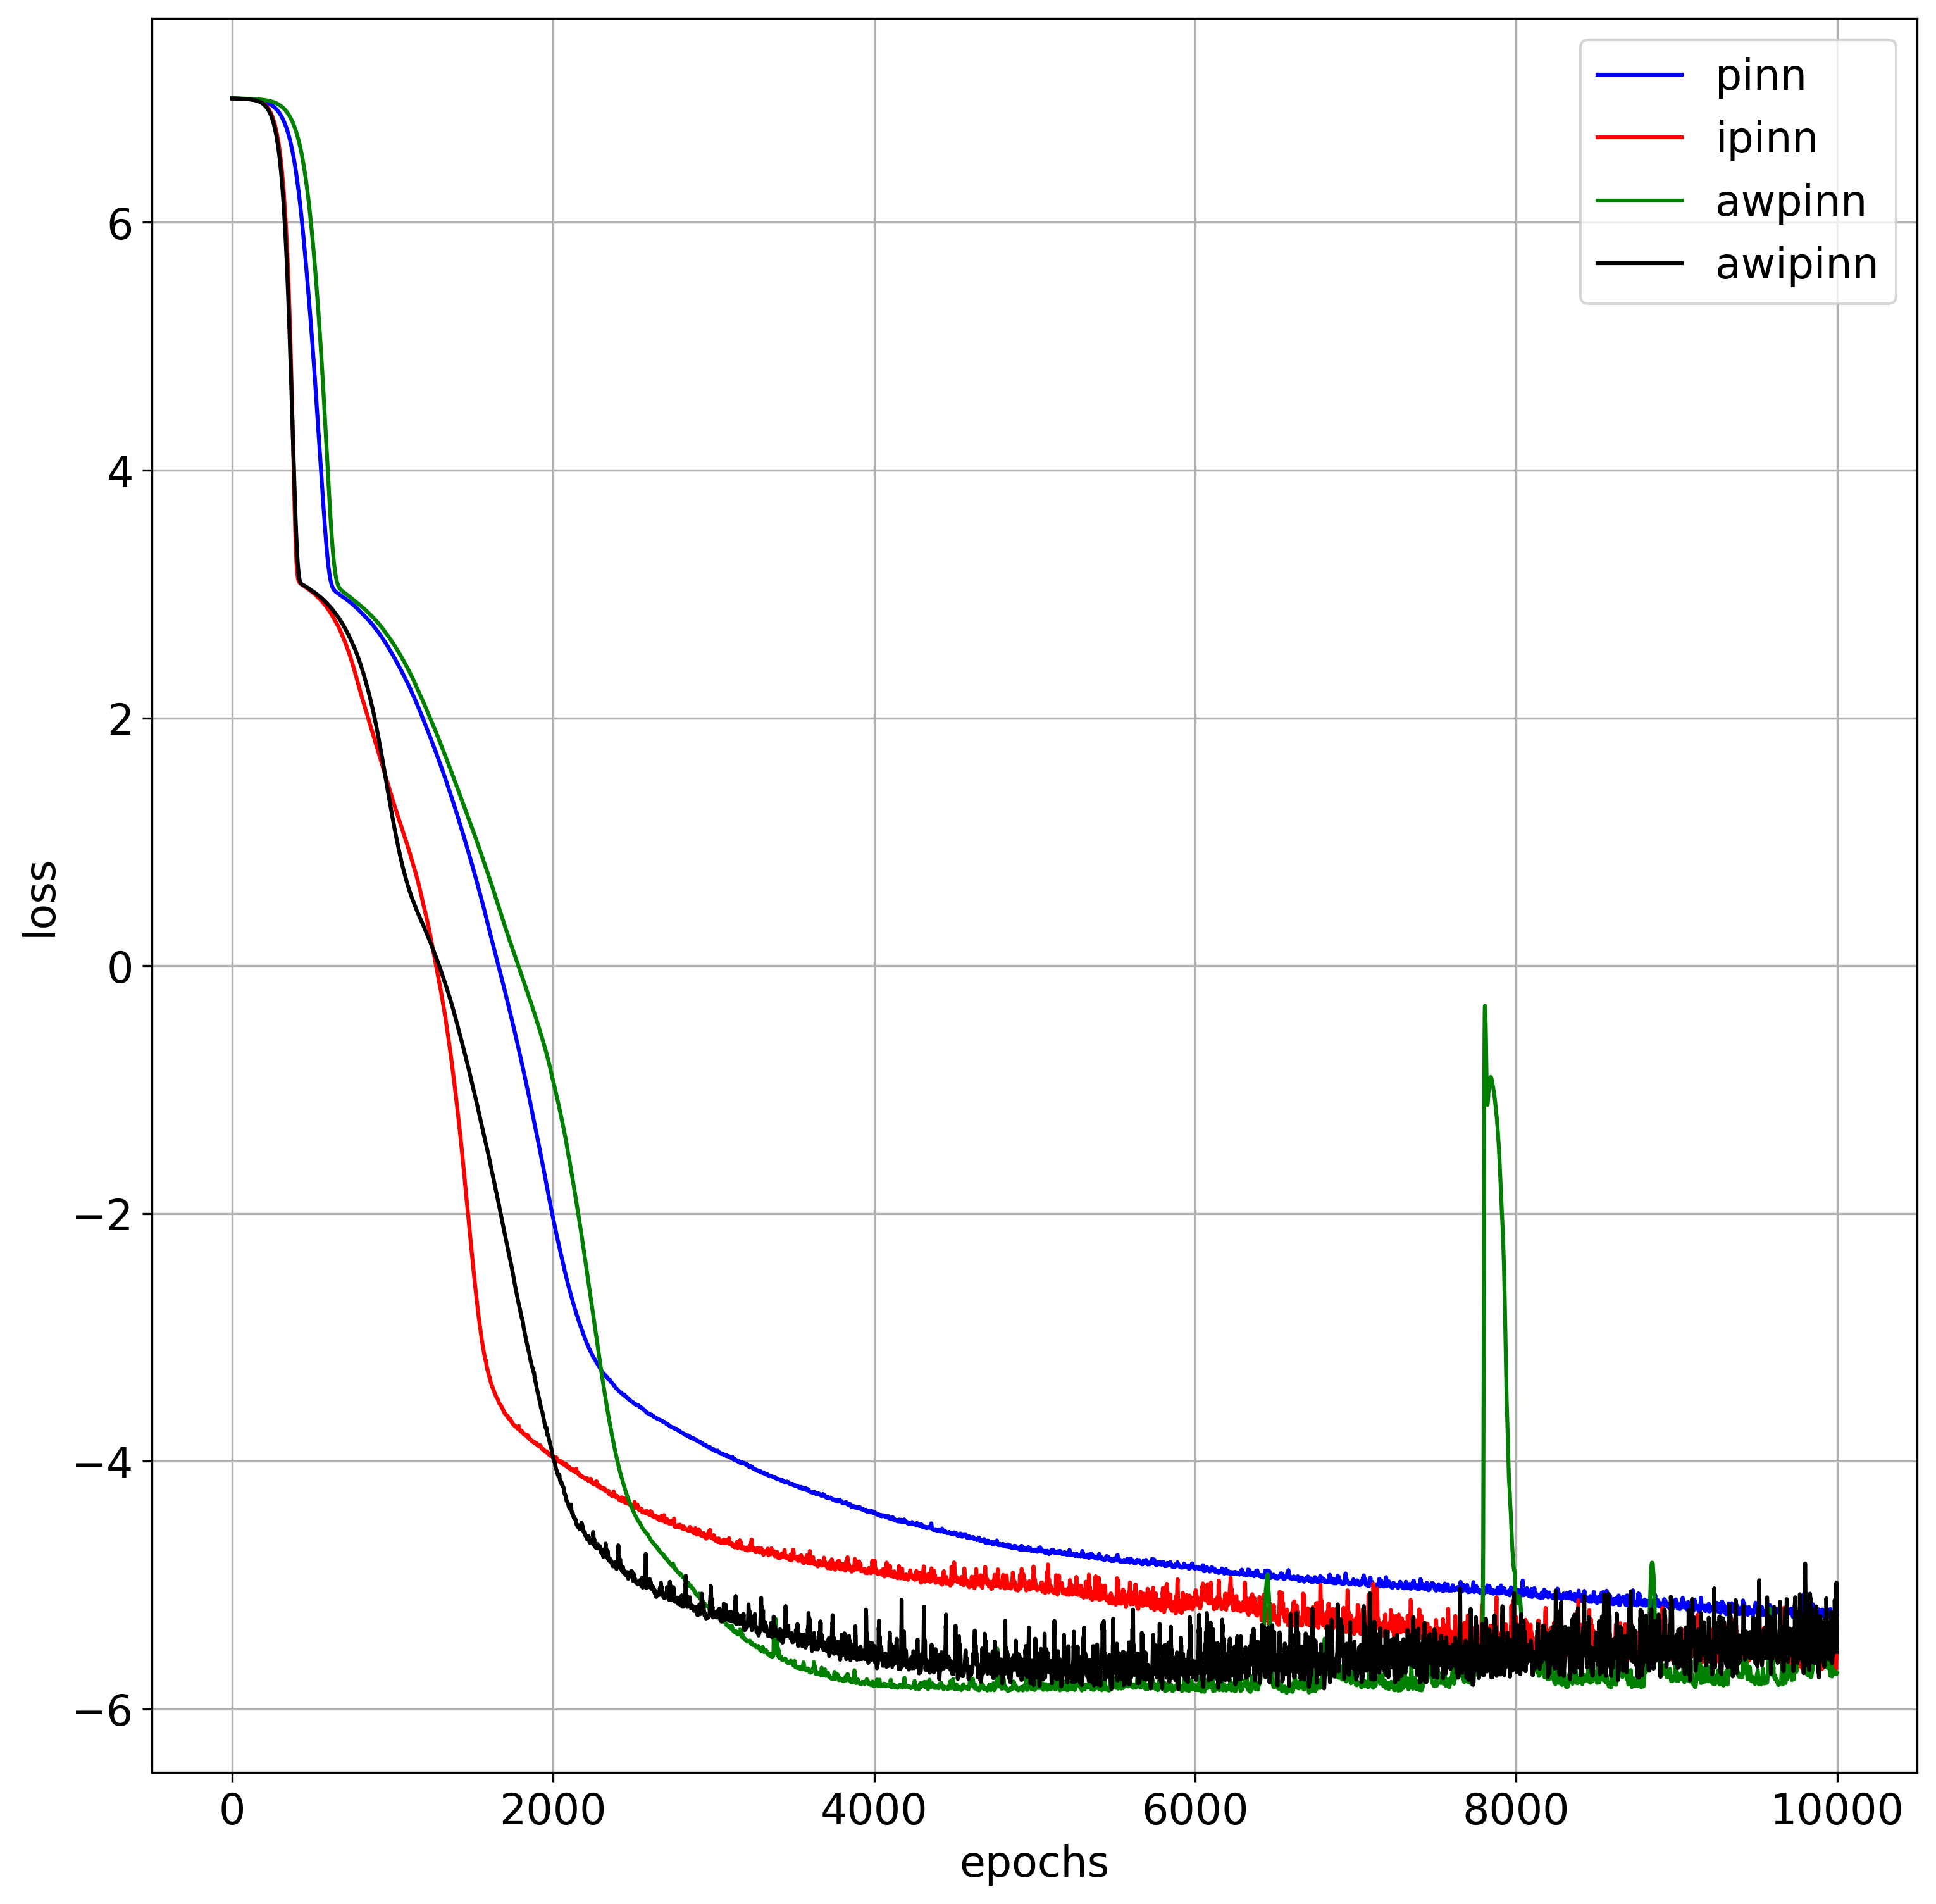

In [8]:
# Function to load average loss data for a given configuration
def load_average_loss(config):
    loss_data = pd.read_csv(f'test_final_performance/{config}/average_loss.csv')
    return loss_data['Average_MSE_Loss'].to_numpy()

# Function to create and save a loss plot for a given configuration
def create_loss_plot(config, num_epochs=10000):
    loss_list1 = load_average_loss(f'pinn/{config}')
    loss_list2 = load_average_loss(f'ipinn/{config}')
    loss_list3 = load_average_loss(f'awpinn/{config}')
    loss_list4 = load_average_loss(f'awipinn/{config}')
    
    fig = plt.figure(figsize=(12, 12))
    plt.plot(range(num_epochs), [np.log(item) for item in loss_list1[:num_epochs]], color='blue', label='pinn')
    plt.plot(range(num_epochs), [np.log(item) for item in loss_list2[:num_epochs]], color='red', label='ipinn')
    plt.plot(range(num_epochs), [np.log(item) for item in loss_list3[:num_epochs]], color='green', label='awpinn')
    plt.plot(range(num_epochs), [np.log(item) for item in loss_list4[:num_epochs]], color='black', label='awipinn')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'test_final_performance/{config}.png')

# List of configurations to create plots for
configurations = ['1-1-1', '2-1-1', '1-1.5-1.5', '1-2-2']

# Create and save loss plots for each configuration
for config in configurations:
    create_loss_plot(config)